<a href="https://colab.research.google.com/github/Renukumar-R/Taxi-Fare-Prediction-Using-Linear-Regression/blob/main/Taxi_Fare_Prediction_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv('https://raw.githubusercontent.com/Renukumar-R/Taxi-Fare-Prediction-Using-Linear-Regression/main/taxi_fare_data.csv')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_duration      209673 non-null  int64  
 1   distance_traveled  209673 non-null  float64
 2   num_of_passengers  209673 non-null  int64  
 3   fare               209673 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 6.4 MB


In [153]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare
count,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431
std,4775.653621,125.217419,0.930754,85.602702
min,0.000000,0.020000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000
50%,707.000000,3.200000,1.000000,75.000000
75%,1098.000000,5.730000,1.000000,116.250000
max,86387.000000,57283.910000,9.000000,4466.250000


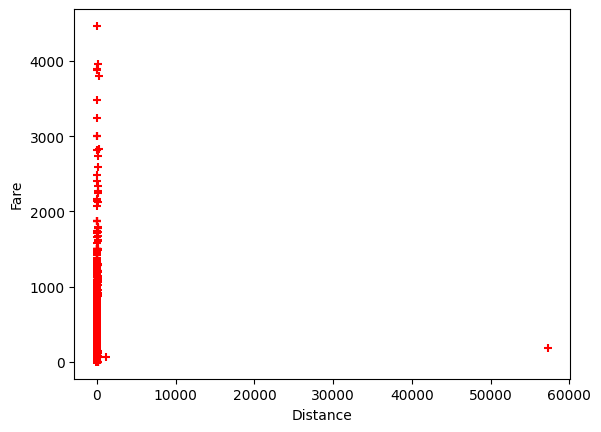

In [154]:
%matplotlib inline
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.scatter(df.distance_traveled,df.fare,color='red',marker='+')

In [164]:
#Removing the outliers from dataset
IQR = df.quantile(0.75) - df.quantile(0.25)
threshold_multiplier = 0.4 # adjust this value based on r-squared value
outlier_mask = (df < (df.quantile(0.25) - threshold_multiplier * IQR)) | (df > (df.quantile(0.75) + threshold_multiplier * IQR))
df_no_outliers = df[~outlier_mask.any(axis=1)]

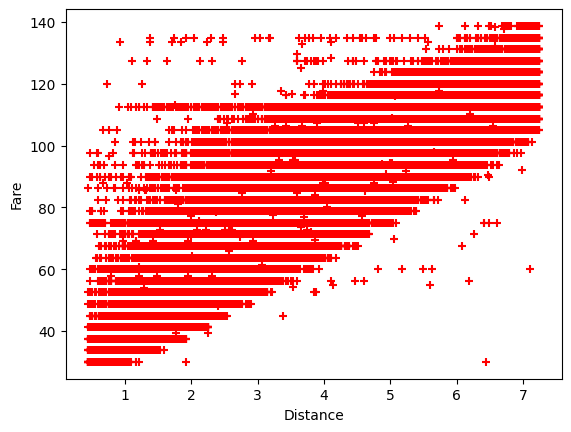

In [165]:
%matplotlib inline
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.scatter(df_no_outliers.distance_traveled,df_no_outliers.fare,color='red',marker='+')

In [166]:
df_no_outliers.describe()

,trip_duration,distance_traveled,num_of_passengers,fare
count,130502.000000,130502.000000,130502.0,130502.000000
mean,642.129868,2.981605,1.0,69.799260
std,278.443475,1.472674,0.0,23.225543
min,186.000000,0.450000,1.0,30.000000
25%,420.000000,1.850000,1.0,52.500000
50%,604.000000,2.670000,1.0,67.500000
75%,830.000000,3.880000,1.0,86.250000
max,1358.000000,7.240000,1.0,138.750000


In [167]:
# Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(df_no_outliers[['trip_duration','distance_traveled','num_of_passengers']], df_no_outliers[['fare']], test_size=0.2, random_state=2023)

In [168]:
# Training the model
model = linear_model.LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [169]:
# Evaluate the trained model
y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 21.334656790470067
Root Mean Squared Error (RMSE): 4.618945419732741
R-squared (R2): 0.9604711609824237


In [180]:
#Predicting the own data
duration = 50
distance = 17
passanger = 2
model.predict([[duration,distance,passanger]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[151.98541176]])